In [1]:
import yfinance as yf
import pandas as pd

dataF = yf.download("BTC-USD", start="2022-04-1", end="2023-04-1", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [3]:
dataF=dataF[dataF["High"]!=dataF['Low']]
dataF.reset_index(inplace=True)
dataF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-04-01,45554.164062,46616.242188,44403.140625,46281.644531,46281.644531,38162644287
1,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194
2,2022-04-03,45859.128906,47313.476562,45634.105469,46453.566406,46453.566406,25414397610
3,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455
4,2022-04-05,46624.507812,47106.140625,45544.808594,45555.992188,45555.992188,29640604055
...,...,...,...,...,...,...,...
360,2023-03-27,27994.068359,28037.925781,26606.689453,27139.888672,27139.888672,18188895178
361,2023-03-28,27132.888672,27460.718750,26677.818359,27268.130859,27268.130859,17783600385
362,2023-03-29,27267.031250,28619.542969,27259.662109,28348.441406,28348.441406,20684945906
363,2023-03-30,28350.140625,29159.902344,27720.160156,28033.562500,28033.562500,22435349951


In [7]:
def rejection_signal(df): 
    #bullish signal
    if ( df.Open.iloc[-1] < df.Close.iloc[-1] and
       (df.High.iloc[-1] - df.Close.iloc[-1]) < abs(df.Open.iloc[-1]-df.Close.iloc[-1])/10 and
       (df.Open.iloc[-1] - df.Low.iloc[-1]) > abs(df.Open.iloc[-1]-df.Close.iloc[-1])*5):
        return 2
    
    #bearish signal
    elif ( df.Open.iloc[-1] > df.Close.iloc[-1] and
       (df.High.iloc[-1] - df.Open.iloc[-1]) > abs(df.Open.iloc[-1]-df.Close.iloc[-1])*5 and
       (df.Close.iloc[-1] - df.Low.iloc[-1]) < abs(df.Open.iloc[-1]-df.Close.iloc[-1])/10):
        return 1
    
    #nosignal
    else:
        return 0

def engulfing_signal(df):
    # Get the current and previous candles
    previous_candle = df.iloc[-2]
    current_candle = df.iloc[-1]

    # Check for bullish engulfing
    if ( (current_candle['Close'] > previous_candle['Open']) 
        and (current_candle['Open'] < previous_candle['Close'])
        and (previous_candle['Open'] > previous_candle['Close']) ):
        return 2

    # Check for bearish engulfing
    elif ( (current_candle['Open'] > previous_candle['Close']) 
          and (current_candle['Close'] < previous_candle['Open']) 
          and (previous_candle['Close'] > previous_candle['Open']) ):
        return 1

    # Return 0 for any other case
    else:
        return 0
    

signal = [0]*len(dataF)
for i in range(3,len(dataF)):
    df = dataF[i-3:i+1]
    signal[i]= rejection_signal(df)
dataF["rejection_signal"] = signal

signal = [0]*len(dataF)
for i in range(1,len(dataF)):
    df = dataF[i-1:i+1]
    signal[i]= engulfing_signal(df)
dataF["engulfing_signal"] = signal

In [25]:
up_count = 0
down_count = 0
total_count = 0

for i in range(len(dataF) - 1):
    if dataF.engulfing_signal.iloc[i] == 1:
        total_count += 1
        if dataF.Close.iloc[i+1] > dataF.Open.iloc[i+1]:
            up_count += 1
        elif dataF.Close.iloc[i+1] < dataF.Open.iloc[i+1]:
            down_count += 1

up_percentage = (up_count / total_count) * 100
down_percentage = (down_count / total_count) * 100

In [27]:
print(up_percentage, down_percentage, total_count)

68.42105263157895 31.57894736842105 19


In [31]:
dataF[dataF["engulfing_signal"]==1]

,Date,Open,High,Low,Close,Adj Close,Volume,rejection_signal,engulfing_signal
4,2022-04-05,46624.507812,47106.140625,45544.808594,45555.992188,45555.992188,29640604055,0,1
7,2022-04-08,43505.136719,43903.019531,42183.289062,42287.664062,42287.664062,27215995394,0,1
61,2022-06-01,31792.554688,31957.285156,29501.587891,29799.080078,29799.080078,41135817341,0,1
63,2022-06-03,30467.806641,30633.035156,29375.689453,29704.390625,29704.390625,26175547452,0,1
76,2022-06-16,22576.304688,22868.921875,20265.226562,20381.650391,20381.650391,31183975654,0,1
78,2022-06-18,20473.425781,20736.041016,17708.623047,19017.642578,19017.642578,42009436760,0,1
82,2022-06-22,20719.414062,20835.750000,19848.078125,19987.029297,19987.029297,28574793478,0,1
107,2022-07-17,21195.041016,21600.640625,20778.179688,20779.343750,20779.343750,22927802083,0,1
130,2022-08-09,23811.484375,23898.615234,22982.000000,23164.318359,23164.318359,23555719219,0,1
135,2022-08-14,24429.056641,24974.914062,24206.259766,24319.333984,24319.333984,22994133555,0,1


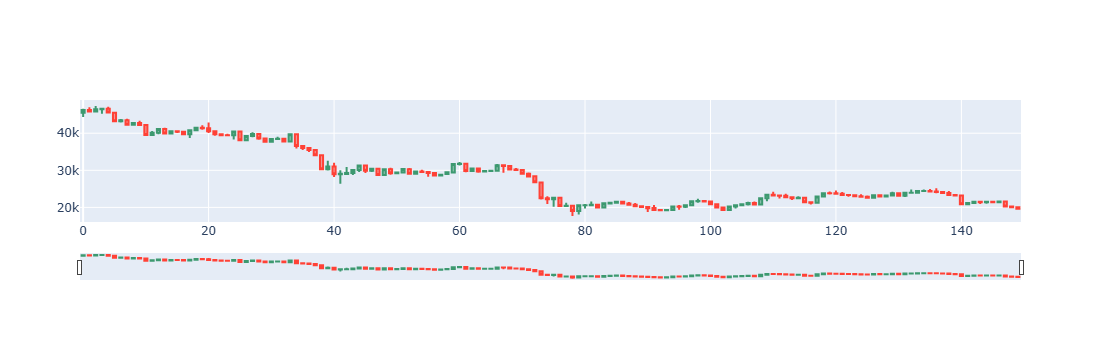

In [33]:
import plotly.graph_objects as go

st = 0
dfpl = dataF[st:st+150].copy()
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.show()

In [35]:
def average_next_n_candles(df, i, N):
    # Check if there are N candles after the current one
    if i + N >= len(df):
        return None

    # Compute the average closing price of the next N candles
    avg_price = df['Close'].iloc[i+1:i+N+1].mean()

    # Compare the average price to the current closing price
    if avg_price < df['Close'].iloc[i]:
        return 1
    elif avg_price > df['Close'].iloc[i]:
        return 2
    else:
        return 0

N=4
signal = [0]*len(dataF)
for i in range(len(dataF)-N):
    signal[i]= average_next_n_candles(dataF, i, N)
dataF["price_target"] = signal

In [37]:
dataF[dataF["engulfing_signal"]==dataF["price_target"]].count()

Date                20
Open                20
High                20
Low                 20
Close               20
Adj Close           20
Volume              20
rejection_signal    20
engulfing_signal    20
price_target        20
dtype: int64

In [39]:
equal_count = 0
different_count = 0
total_count = 0

for i in range(len(dataF)):
    if dataF.engulfing_signal.iloc[i] != 0:
        total_count += 1
        if dataF.engulfing_signal.iloc[i] == dataF.price_target.iloc[i]:
            equal_count += 1
        else:
            different_count += 1

equal_percentage = (equal_count / total_count) * 100
different_percentage = (different_count / total_count) * 100

In [41]:
print(equal_percentage, different_percentage)

39.53488372093023 60.46511627906976


In [45]:
dataF

,Date,Open,High,Low,Close,Adj Close,Volume,rejection_signal,engulfing_signal,price_target
0,2022-04-01,45554.164062,46616.242188,44403.140625,46281.644531,46281.644531,38162644287,0,0,1
1,2022-04-02,46285.500000,47028.281250,45782.511719,45868.949219,45868.949219,29336594194,0,0,1
2,2022-04-03,45859.128906,47313.476562,45634.105469,46453.566406,46453.566406,25414397610,0,2,1
3,2022-04-04,46445.273438,46791.089844,45235.816406,46622.675781,46622.675781,32499785455,0,0,1
4,2022-04-05,46624.507812,47106.140625,45544.808594,45555.992188,45555.992188,29640604055,0,1,1
...,...,...,...,...,...,...,...,...,...,...
360,2023-03-27,27994.068359,28037.925781,26606.689453,27139.888672,27139.888672,18188895178,0,0,2
361,2023-03-28,27132.888672,27460.718750,26677.818359,27268.130859,27268.130859,17783600385,0,0,0
362,2023-03-29,27267.031250,28619.542969,27259.662109,28348.441406,28348.441406,20684945906,0,0,0
363,2023-03-30,28350.140625,29159.902344,27720.160156,28033.562500,28033.562500,22435349951,0,0,0
